<a href="https://colab.research.google.com/github/Haamid219/NIDS/blob/main/Nids_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data = pd.read_csv('/content/cleaned_ids2018_sampled.csv')
data.dropna(inplace=True)
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])
scaler = StandardScaler()
data[data.columns[:-1]] = scaler.fit_transform(data[data.columns[:-1]])
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length, :-1])
        labels.append(data[i + seq_length, -1])
    return np.array(sequences), np.array(labels)

seq_length = 10
sequences, labels = create_sequences(data.values, seq_length)


In [2]:
model = Sequential()
model.add(LSTM(64, input_shape=(sequences.shape[1], sequences.shape[2]), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Adjust for multiclass
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42)

In [4]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.1496 - loss: 0.6818 - val_accuracy: 0.0416 - val_loss: 0.6445
Epoch 2/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.0531 - loss: 0.6482 - val_accuracy: 0.0441 - val_loss: 0.6554
Epoch 3/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.0849 - loss: 0.6495 - val_accuracy: 0.0437 - val_loss: 0.6502
Epoch 4/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.0756 - loss: 0.6265 - val_accuracy: 0.0387 - val_loss: 0.6669
Epoch 5/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.1060 - loss: 0.6383 - val_accuracy: 0.0770 - val_loss: 0.6698
Epoch 6/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.1172 - loss: 0.6099 - val_accuracy: 0.1074 - val_loss: 0.6725
Epoch 7/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.1239 - loss: 0.5997 - val_accuracy: 0.1091 - val_loss: 0.6962
Epoch 8/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.1752 - loss: 0.5468 - val_

In [5]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3606 - loss: 13.7022
Test Accuracy: 0.3533


In [6]:
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step


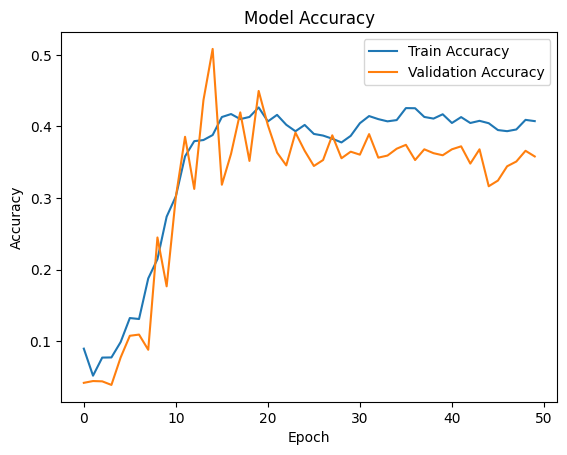

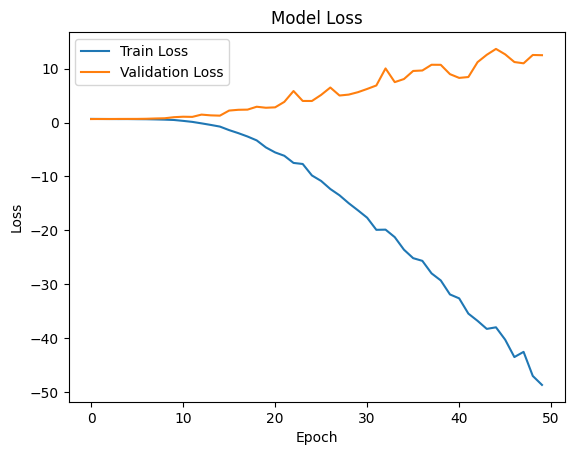

In [7]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
